In [7]:
from scipy.stats import ttest_ind
from itertools import combinations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter('ignore')
%matplotlib inline

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

In [8]:
df = pd.read_csv('stud_math.csv')

In [9]:
display(df.head(10))
df.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

studytime, granular - неизвестные данные, которые можно опустить

In [10]:
df.drop(['studytime, granular'], inplace=True, axis=1)

# Обработка данных

## Обработка числовых значений

In [11]:
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


номера = 13

строки = 16 (Mjob, Fjob, reason, guardian - строковые значения где больше 2 перемнных)

### *Age*

In [12]:
pd.DataFrame(df.age.value_counts())

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

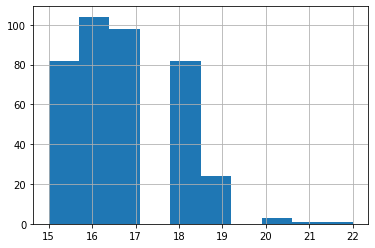

In [13]:
df.age.hist()
df.age.describe()

На основе графика можно сказать что основной контингент детей сведен к детям не старше 19 лет, следовательно детьми старше 19 лет можно пренебречь.

In [14]:
df = df.loc[df.age <= 19]

In [15]:
pd.DataFrame(df.age.value_counts())

,age
16,104
17,98
18,82
15,82
19,24


### *Medu,Fedu*

In [16]:
pd.DataFrame(df.Medu.value_counts())

,Medu
4.0,130
2.0,101
3.0,95
1.0,58
0.0,3


In [17]:
pd.DataFrame(df.Fedu.value_counts())

,Fedu
2.0,103
3.0,96
4.0,88
1.0,76
0.0,2
40.0,1


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FFD6379640>,
      dtype=object)

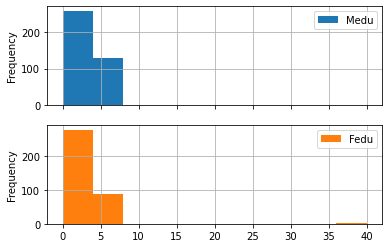

In [18]:
df[['Medu', 'Fedu']].plot(kind='hist', grid=True, subplots=True,)

В образовнии отцов виден явный воброс скорее всего являющийся ошибкой. От него можно избавится

In [19]:
df = df.loc[df.Fedu <= 4.0]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FFD5E4A790>,
      dtype=object)

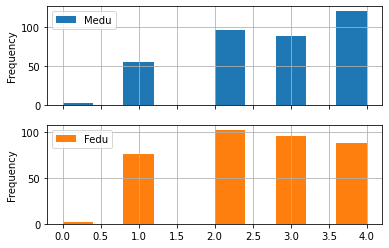

In [20]:
df[['Medu', 'Fedu']].plot(kind = 'hist', grid = True, subplots = True)

На графиках так же видно что родители без образования практически отсутствуют так, что эти данные можно еще сократить.

In [21]:
df = df.loc[df.Fedu > 0.0]

In [22]:
df = df.loc[df.Medu > 0.0]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FFD5EA64F0>,
      dtype=object)

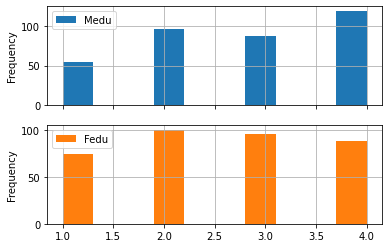

In [23]:
df[['Medu', 'Fedu']].plot(kind='hist', grid=True, subplots=True)

Можно отметить, что по статистике матери являются образованее отцов

### *traveltime,studytime,failures*

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FFD61BF9A0>,
      dtype=object)

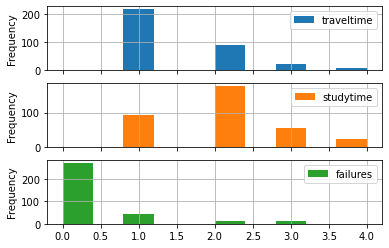

In [24]:
df[['traveltime', 'studytime', 'failures']].plot(
    kind='hist', grid=True, subplots=True)

In [25]:
pd.DataFrame(df.studytime.value_counts())

,studytime
2.0,177
1.0,93
3.0,56
4.0,24


In [26]:
pd.DataFrame(df.failures.value_counts())

,failures
0.0,271
1.0,44
2.0,12
3.0,12


In [27]:
pd.DataFrame(df.traveltime.value_counts())

,traveltime
1.0,216
2.0,88
3.0,21
4.0,7


На основе данных выше можно сказать, что большинство семей живет недалеко от места учебы и не имеет внеучебных неудач. Так же большая часть детей тратит на около 2-5 часов времени на учебу помимо школы.

### *famrel,freetime,goout,health*

Text(0.5, 1.0, 'health')

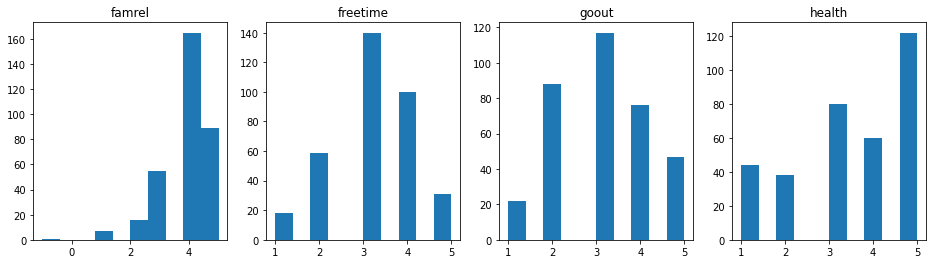

In [28]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
axes[0].hist(df['famrel'])
axes[0].set_title('famrel')

axes[1].hist(df['freetime'])
axes[1].set_title('freetime')

axes[2].hist(df['goout'])
axes[2].set_title('goout')

axes[3].hist(df['health'])
axes[3].set_title('health')

На данных графиках видно что показатель семейных отношений имеет выбросы.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FFD676CAF0>],
      dtype=object)

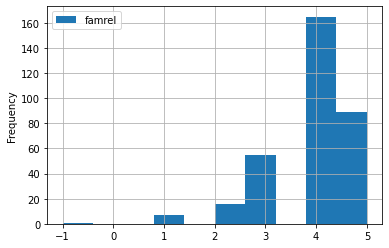

In [29]:
df[['famrel']].plot(kind='hist', grid=True, subplots=True)

In [30]:
pd.DataFrame(df.famrel.value_counts())

,famrel
4.0,165
5.0,89
3.0,55
2.0,16
1.0,7
-1.0,1


Видно что имеется выброс с оченкой -1. Т.к. оценка обозначена от 1 до 5 от данного значения стоит избавится.

In [31]:
df = df.loc[df.famrel > 0]

In [32]:
pd.DataFrame(df.famrel.value_counts())

,famrel
4.0,165
5.0,89
3.0,55
2.0,16
1.0,7


Text(0.5, 1.0, 'health')

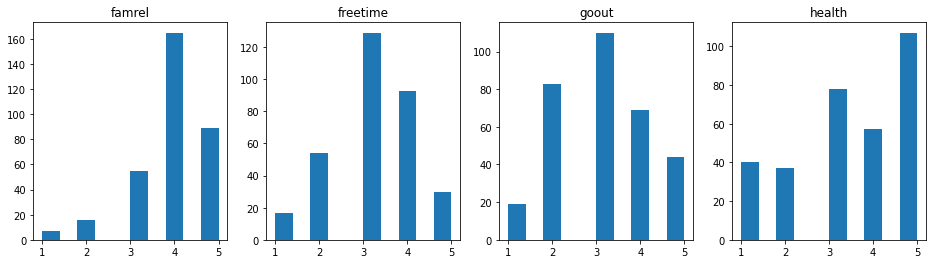

In [33]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
axes[0].hist(df['famrel'])
axes[0].set_title('famrel')

axes[1].hist(df['freetime'])
axes[1].set_title('freetime')

axes[2].hist(df['goout'])
axes[2].set_title('goout')

axes[3].hist(df['health'])
axes[3].set_title('health')

На основе данных графиков можно сказать что:
1. Семейные отношния в исходя из данных в основном положительные.
2. Свободного времени у детей в среднем достаточне.
3. Дети в основнос здоровы, но наблюдается значительное количество детей имеющих проблеммы со здоровьем.
4. Судя по графикам дети имеют друзей и проводят с ними время в среднем в половине случаев.

### *absences*

In [34]:
pd.DataFrame(df.absences.value_counts())

,absences
0.0,91
2.0,52
4.0,45
6.0,27
8.0,19
10.0,14
12.0,11
14.0,9
3.0,7
16.0,6


count    320.000000
mean       6.803125
std       22.471898
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

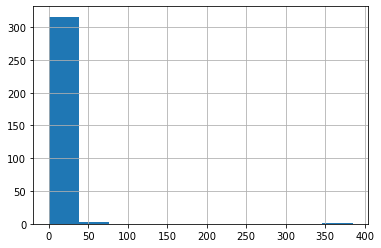

In [35]:
df.absences.hist()
df.absences.describe()

Очевидно что в столбце пропущенных занятий приствуют выбросы. Так как данных много есть смысл воспользоватся формулой межквартильного растояния.

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


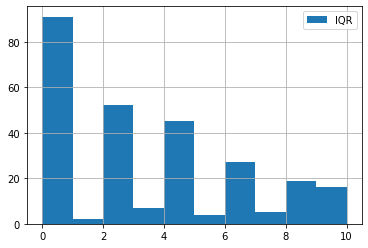

In [36]:
IQR = df.absences.quantile(0.75) - df.absences.quantile(0.25)
perc25 = df.absences.quantile(0.25)
perc75 = df.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

df.absences.loc[df.absences.between(
    perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=10, range=(0, 10), label='IQR')

plt.legend()

На основе графика можно сделать следующие выводы.
1. Данными свыше 20 можно пренебречь.
2. Так как количество занятий не может быть отрицательным то выбросов в нижней границе нет.
3. Так же большая часть детей не пропускает занятия.

In [37]:
df = df.loc[df.absences <= 20]

### *score*

In [38]:
pd.DataFrame(df.score.value_counts())

,score
50.0,48
55.0,38
0.0,29
65.0,27
60.0,25
70.0,23
75.0,22
40.0,21
45.0,16
80.0,15


count    301.000000
mean      52.059801
std       22.407062
min        0.000000
25%       45.000000
50%       55.000000
75%       65.000000
max      100.000000
Name: score, dtype: float64

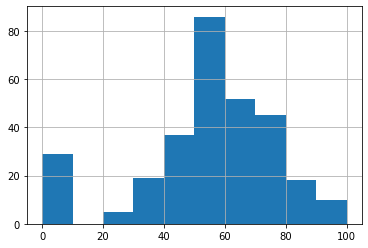

In [39]:
df.score.hist()
df.score.describe()

Из данного графика видно что скорее всего используется 100 бальная система оценки. Нижняя граница 0 верхняя что является допустимыми пределами.

## Обработка строковых значений

В данном таблице 16 строковых значений, но многие из них имеет 2 значения. Больше всего нас интересуют столбцы Mjob, Fjob, reason, guardian где значений больше т.к. там есть большая вероятность выбросов.

### *Mjob, Fjob*

In [40]:
pd.DataFrame(df.Mjob.value_counts())

,Mjob
other,104
services,70
at_home,48
teacher,41
health,28


In [41]:
pd.DataFrame(df.Fjob.value_counts())

,Fjob
other,158
services,76
teacher,22
at_home,13
health,10


Из столбцов указывающих где работают родители, что родители детей чаще всего гос.служащие, либо их профессия в таблице не указана. А так же что места работ матерей равномерно распределенно, в то время как у работ отцов наблюдается смещение в сторону, гос. службы и других работ.

### *reason*

In [42]:
pd.DataFrame(df.reason.value_counts())

,reason
course,103
reputation,81
home,80
other,28


Здесь можно сделать вывод, что обычно семьи выбиратют школу по образовательной программе.

### *guardian*

In [43]:
pd.DataFrame(df.guardian.value_counts())

,guardian
mother,195
father,66
other,19


Можно выделить что чаще всего опекуном является мать.

### *school, sex, address, famsize, Pstatus*

In [44]:
pd.DataFrame(df.school.value_counts())

,school
GP,269
MS,37


In [45]:
pd.DataFrame(df.sex.value_counts())

,sex
F,164
M,142


In [46]:
pd.DataFrame(df.address.value_counts())

,address
U,229
R,67


In [47]:
pd.DataFrame(df.famsize.value_counts())

,famsize
GT3,203
LE3,84


In [48]:
pd.DataFrame(df.Pstatus.value_counts())

,Pstatus
T,248
A,25


Из данных можно выделить, что в основном данные берутся из школы под названием 'GP', больше всего учеников живет в городе и полных семей живущих вместе большинство. Количество девочек и мальчиков относительно равное.

### *schoolsup, famsup, paid, activities, nursery, higher, internet, romantic*

In [49]:
pd.DataFrame(df.schoolsup.value_counts())

,schoolsup
no,259
yes,39


In [50]:
pd.DataFrame(df.famsup.value_counts())

,famsup
yes,168
no,108


In [51]:
pd.DataFrame(df.paid.value_counts())

,paid
no,155
yes,118


In [52]:
pd.DataFrame(df.activities.value_counts())

,activities
yes,155
no,139


In [53]:
pd.DataFrame(df.nursery.value_counts())

,nursery
yes,231
no,60


In [54]:
pd.DataFrame(df.higher.value_counts())

,higher
yes,282
no,12


In [55]:
pd.DataFrame(df.internet.value_counts())

,internet
yes,233
no,45


In [56]:
pd.DataFrame(df.romantic.value_counts())

,romantic
no,190
yes,91


Из вышеуазанных данных можно сказать, что:
1. Дополнительной образовательной поддержки и романтических отношений у данных детей в большинстве случаев нет. 
2. Семейная образовательная поддержка, доп.платные занятия по математике или доп.внеучебные занятия присутствуют примерно в половине семей.
3. Детей ходивших в детский сад, имеющих интеренет или желающих получить высшее образование большинство.

# Замена  Nan на средние значения в числовых данных

In [57]:
def replace(x):
    df[x].fillna(df[x].mean(), inplace=True)

In [58]:
for col in ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
            'freetime', 'goout', 'health', 'absences', 'score']:
    replace(col)

In [59]:
def replace(x):
    df[x] = df[x].apply(np.round)

In [60]:
for col in ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
            'freetime', 'goout', 'health', 'absences', 'score']:
    replace(col)

# Корреляционный анализ

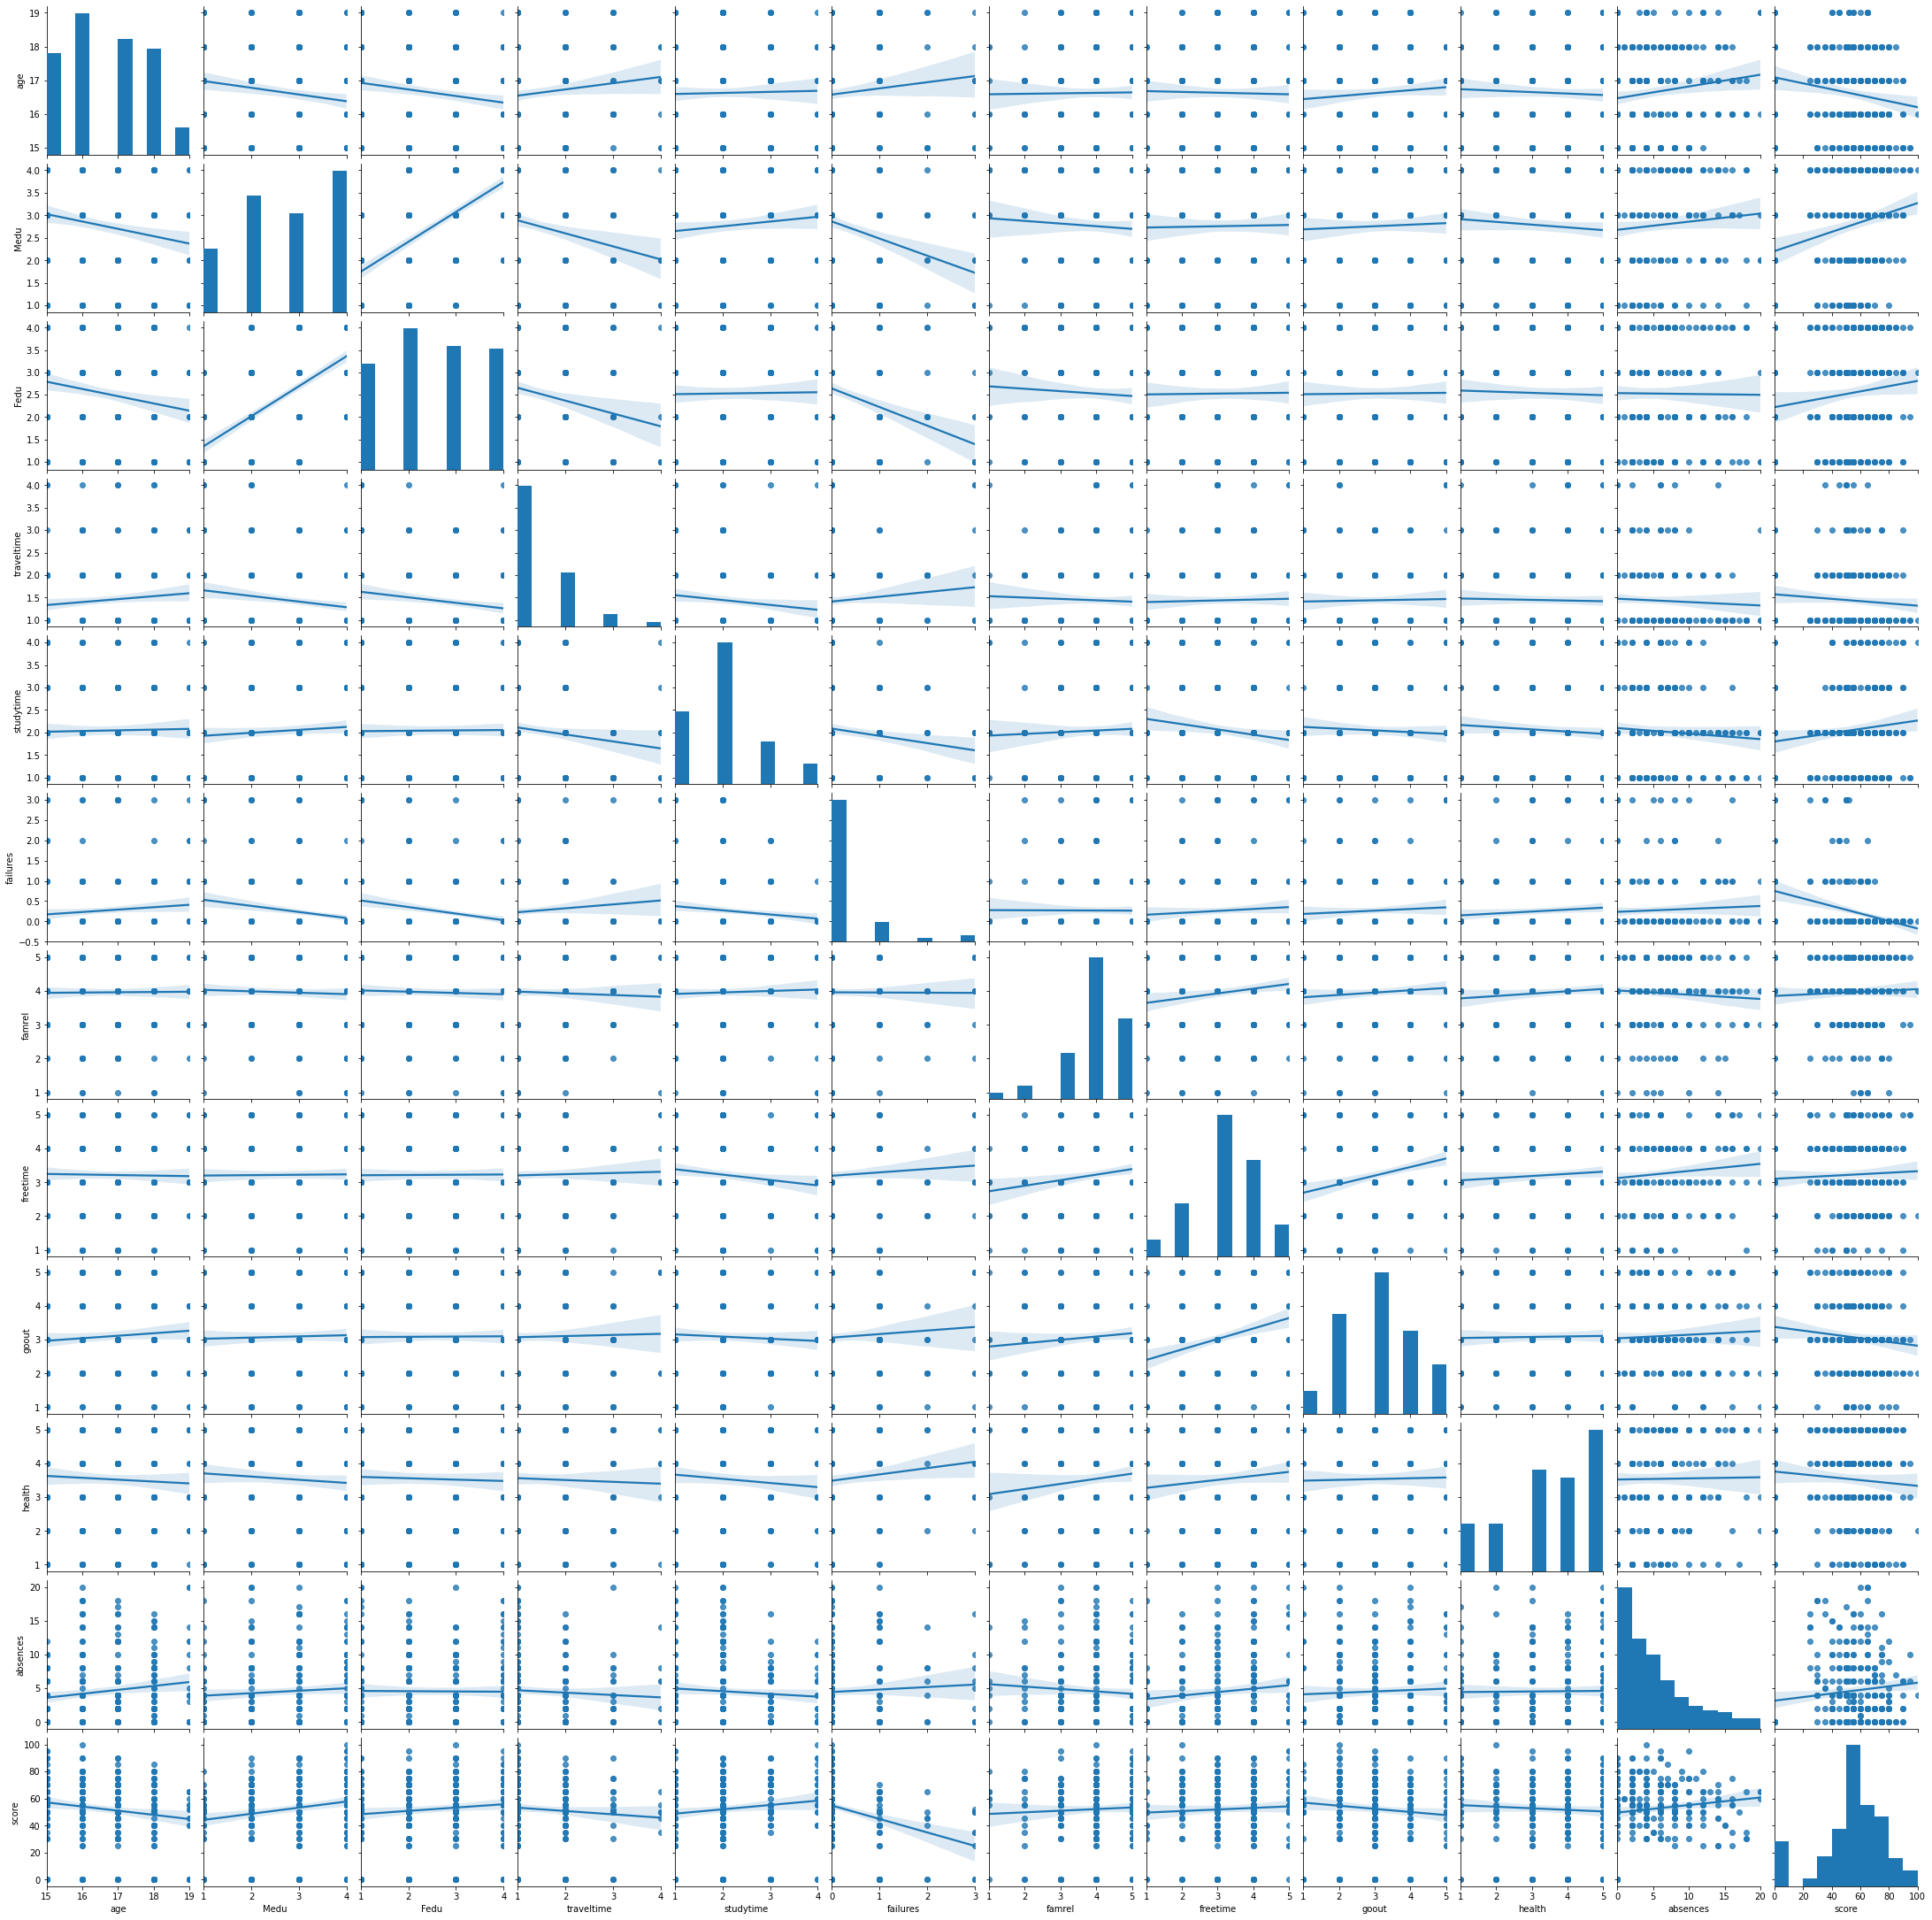

In [61]:
sns.pairplot(df, kind='reg')

In [62]:
df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.180526,-0.178072,0.109956,0.022288,0.103936,0.010670,-0.019685,0.081043,-0.049147,0.142211,-0.165005
Medu,-0.180526,1.000000,0.667996,-0.190277,0.083214,-0.238779,-0.049735,0.012974,0.034966,-0.075677,0.081179,0.219953
Fedu,-0.178072,0.667996,1.000000,-0.187782,0.011296,-0.259586,-0.045410,0.008435,0.007752,-0.032241,-0.008649,0.120406
traveltime,0.109956,-0.190277,-0.187782,1.000000,-0.129643,0.101129,-0.039069,0.025517,0.021571,-0.028803,-0.051161,-0.079031
studytime,0.022288,0.083214,0.011296,-0.129643,1.000000,-0.128555,0.040410,-0.136961,-0.050265,-0.077935,-0.070372,0.122074
failures,0.103936,-0.238779,-0.259586,0.101129,-0.128555,1.000000,-0.004163,0.068953,0.065523,0.094039,0.051133,-0.303935
famrel,0.010670,-0.049735,-0.045410,-0.039069,0.040410,-0.004163,1.000000,0.151872,0.082646,0.103096,-0.067069,0.049147
freetime,-0.019685,0.012974,0.008435,0.025517,-0.136961,0.068953,0.151872,1.000000,0.280926,0.087073,0.103863,0.050900
goout,0.081043,0.034966,0.007752,0.021571,-0.050265,0.065523,0.082646,0.280926,1.000000,0.019132,0.047285,-0.113605
health,-0.049147,-0.075677,-0.032241,-0.028803,-0.077935,0.094039,0.103096,0.087073,0.019132,1.000000,0.011849,-0.070288


Данные которые влияют на столбец score исходя из таблицы это:
    Medu, Fedu, studytime, freetime, famrel, age.

# Анализ номинативных переменных

In [63]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=df,
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

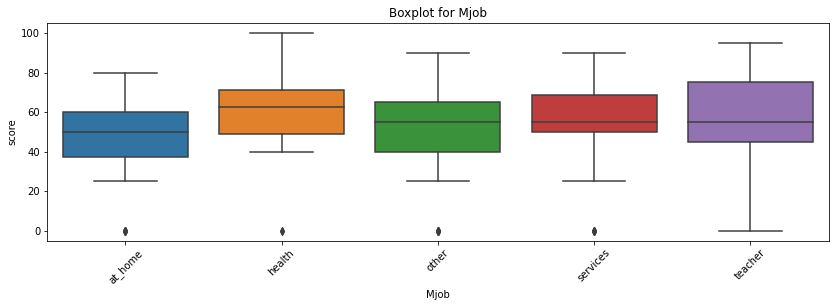

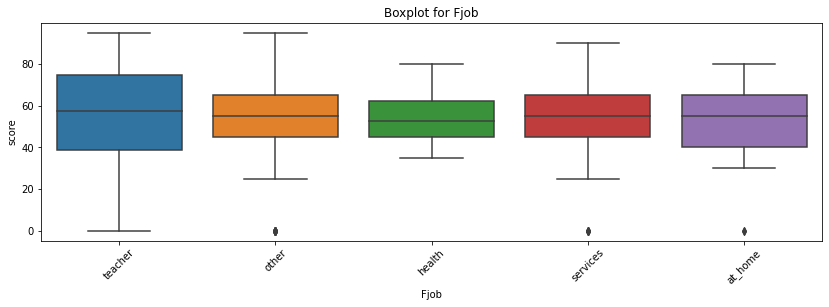

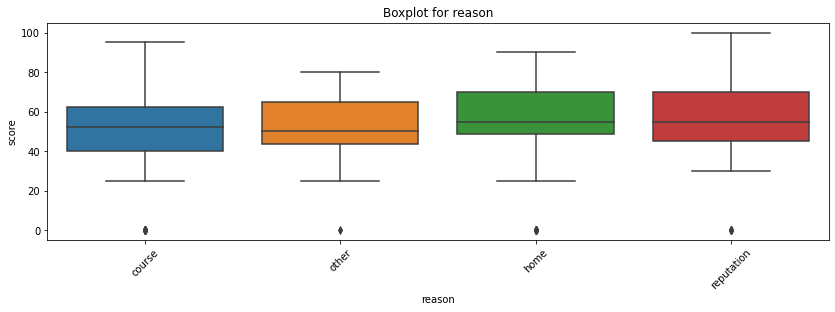

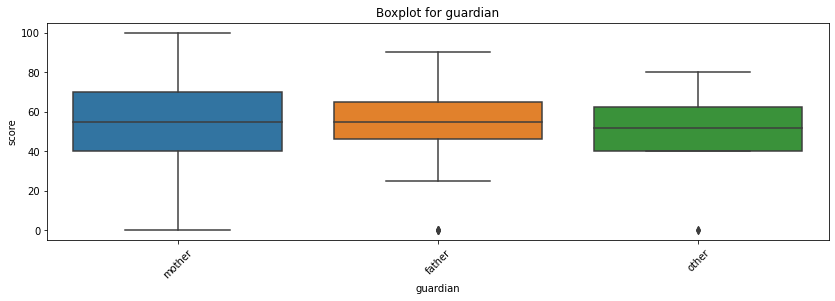

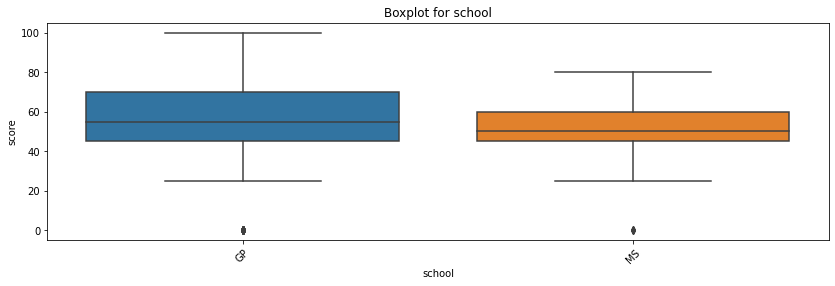

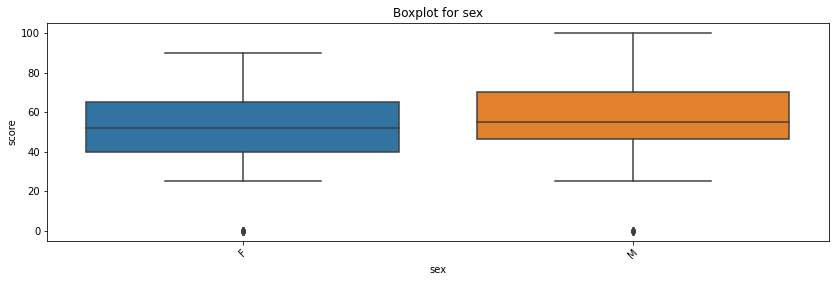

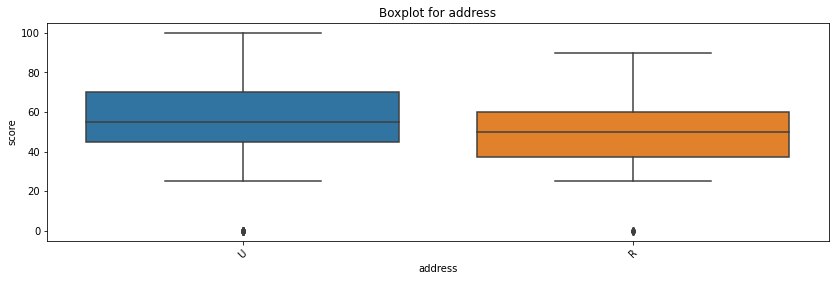

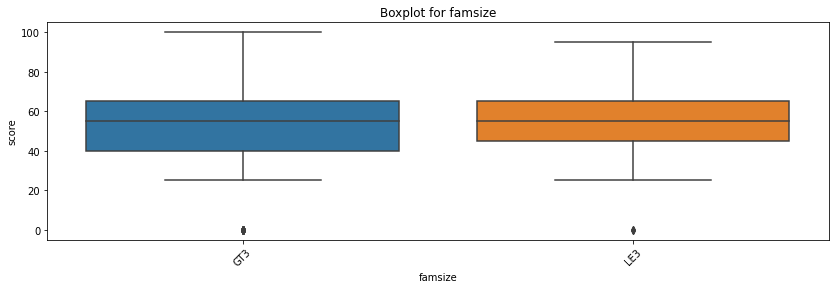

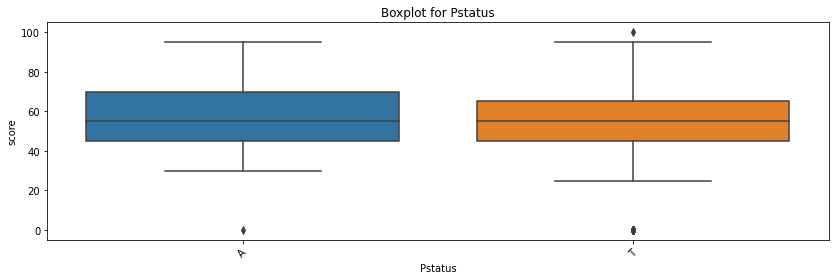

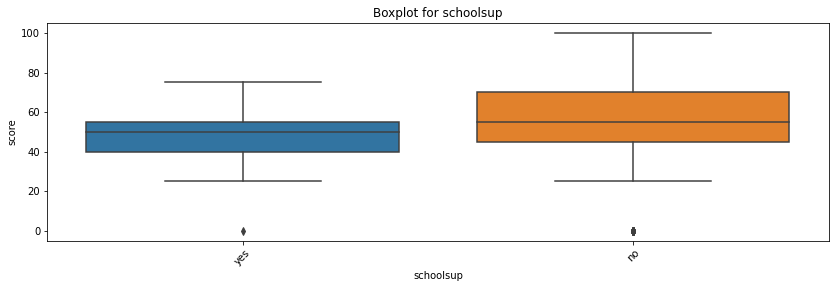

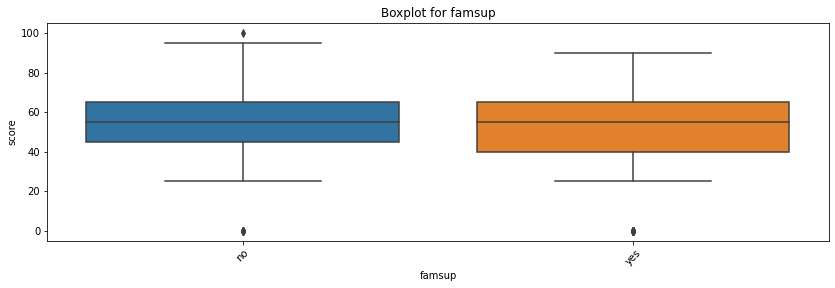

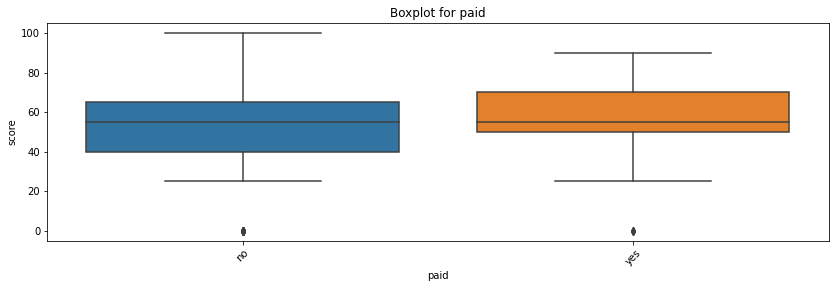

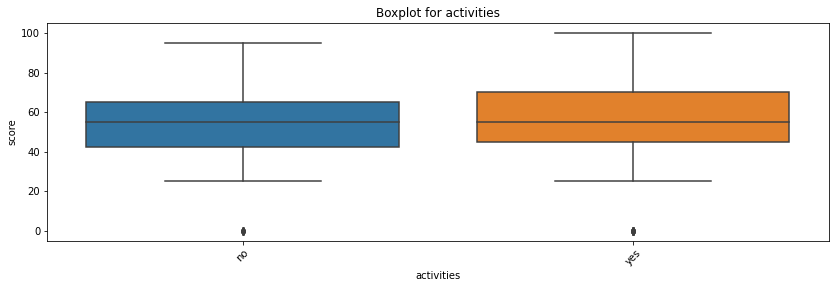

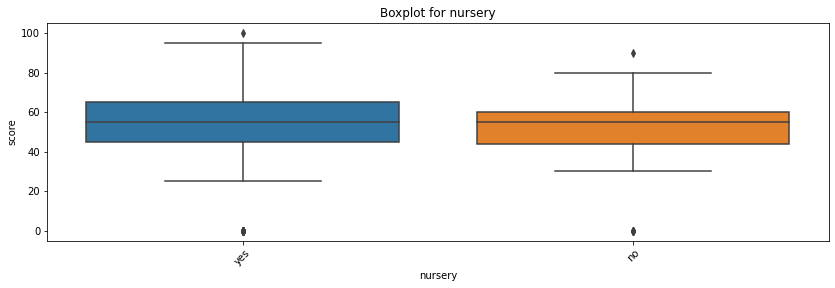

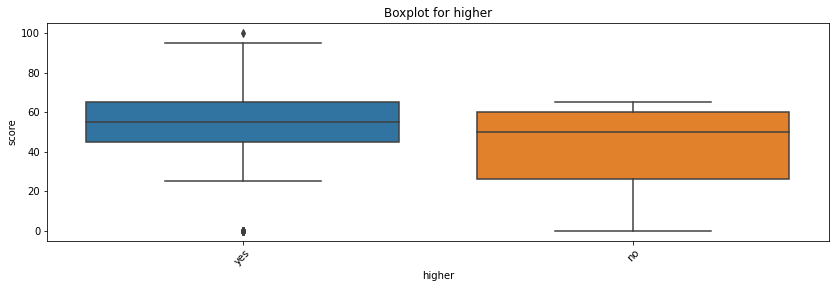

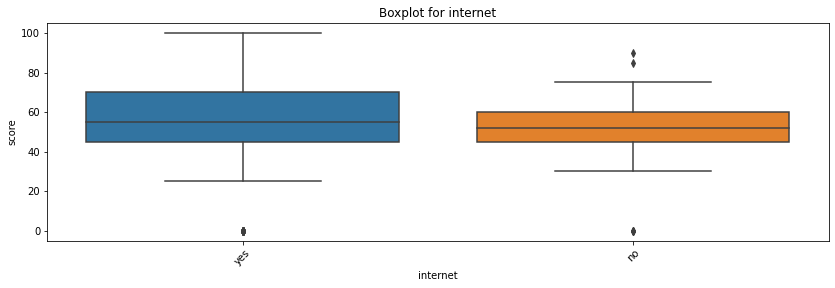

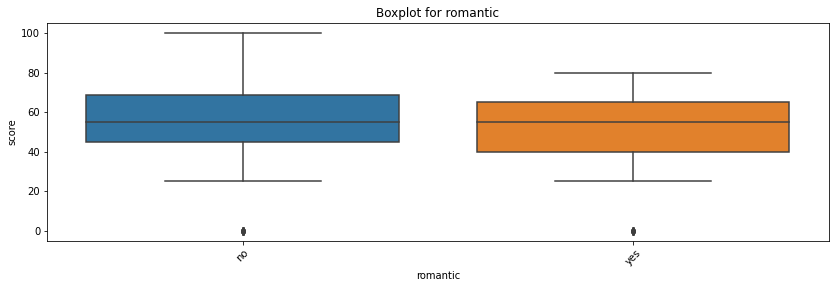

In [64]:
for col in ['Mjob', 'Fjob', 'reason', 'guardian', 'school', 'sex', 'address', 'famsize',
            'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
            'internet', 'romantic']:
    get_boxplot(col)

In [65]:
 def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'], 
                        df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [66]:
for col in ['Mjob','Fjob','reason','guardian','school','sex','address','famsize','Pstatus',
            'schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher


Как видно, серьёзно отличаются 4 параметра: sex, address, paid и higher. Оставим эти переменные в датасете для дальнейшего построения модели.

Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это: sex, address, paid, higher, Medu, Fedu, studytime, freetime, famrel, failures

In [67]:
df_for_model = df.loc[:, ['sex', 'address', 'paid', 'higher',
                          'Medu', 'Fedu', 'studytime', 'freetime', 'famrel', 'failures']]
df_for_model.head()

,sex,address,paid,higher,Medu,Fedu,studytime,freetime,famrel,failures
0,F,U,no,yes,4.0,4.0,2.0,3.0,4.0,0.0
1,F,U,no,yes,1.0,1.0,2.0,3.0,5.0,0.0
2,F,U,NaN,yes,1.0,1.0,2.0,3.0,4.0,3.0
3,F,U,yes,yes,4.0,2.0,3.0,2.0,3.0,0.0
4,F,U,yes,yes,3.0,3.0,2.0,3.0,4.0,0.0


# Выводы

Итак, в результате EDA для анализа влияния условий жизни учеников  на их успеваемость по математике были сделанны следующие выводы:

1. Данные о школе, поле и возрасте оказались самыми заполнеными в остальных наблюдались пропуски
2. Выбросы найдены в столбцах возраста, образования матерей и отцов, показатель семейных отношений и количество пропущенных занятий. Их количество незначительное так, что данные достаточно чистые.
3. Наблюдается положительная корреляция между оценками(score) и образованием отцов и матерей(Medu, Fedu), чем образование родителей выше чем выше оценки. Можно заметить что корреляция с образованием матерей выше, но это связанно с тем, что в исходных данных изначально матери образованее отцов.
4. Так же есть положительная корреляция со столбцом studytime, что говорит о том что те кто дополнительно тратил время на образования получал более высокие оценки.
5. Так есть небольшая положительная корреляция со свободным временем и семейными отношениями (freetime, famrel), что говорит о том что понимание в семье и достаточный отдых от занятий положительно сказывается на оценках.
6. Отрицательная корреляция между возрастом и оценками возможно говорит о том, что образованием ребенка стоит занятся как можно более в юном возрасте, так как более молодые показали более высокие результаты или задания для более молодых были легче чем у взрослых детей.
7. Так же есть отрицательная корреляция между столбцом failures и оценками, что 
8. Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это 
Medu, Fedu, studytime, freetime, famrel, age, sex, address, paid и higher